In [1]:
import gym
from tqdm import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make("FrozenLake-v0", is_slippery = True)
q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
gamma = 0.9
epsilon = 0.3
alpha = 0.1

In [4]:
w_r = []
EPISODE_NUM = 5000
TEST_NUM = 50
for k in tqdm(range(100)):
  q_value = [[0]* env.action_space.n for i in range(env.observation_space.n)]
  win_rates = []
  for j in range(EPISODE_NUM):
    state= env.reset()
    done = False
    while not done:
      if np.random.rand() < epsilon:
            action = env.action_space.sample()
      else:
            action = np.argmax(q_value[state][:])

      next_state, reward, done, _ = env.step(action)
      q_value[state][action] = q_value[state][action] + alpha * (reward + gamma * max(q_value[ next_state]) - q_value[state][action])
      state =  next_state

    policy = [np.argmax(actions) for actions in q_value]
    win_rate = 0
    steps = [0 for i in range(TEST_NUM)]
    for i in range(TEST_NUM):
      done = False
      s = env.reset()
      while not done:
        s, r, done, _ = env.step(policy[s])
        steps[i] += 1
      if r>0:
        win_rate += 1
    win_rates.append(win_rate/100)
  w_r.append(win_rates)

100%|██████████| 1/1 [00:12<00:00, 12.70s/it]


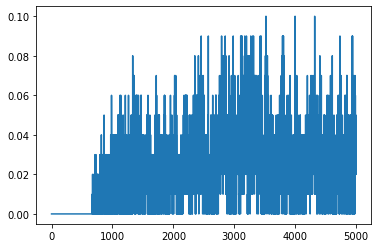

In [5]:
plt.plot(np.mean(w_r, axis = 0))